In [1]:
# Kütüphanelerin yüklenmesi
import numpy as np, pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler as SS
%matplotlib notebook


In [3]:

def PM10_hci(PM10):
    PM10_index=0
    if PM10>=0 and PM10<=50:
        PM10_index=1 # İyi
    elif PM10>=51 and PM10<=100:
        PM10_index=2 # Orta
    elif PM10>=101 and PM10<=260:
        PM10_index=3 # Hassas
    elif PM10>=261 and PM10<=400:
        PM10_index=4 # Sağlıksız
    elif PM10>=401 and PM10<=520:
        PM10_index=5 # Kötü
    elif PM10>=521:
        PM10_index=6 # Tehlikeli
    return PM10_index
        
def SO2_hci(SO2):
    SO2_index=0
    if SO2>=0 and SO2<=100:
        SO2_index=1
    elif SO2>=101 and SO2<=250:
        SO2_index=2
    elif SO2>=251 and SO2<=500:
        SO2_index=3
    elif SO2>=501 and SO2<=850:
        SO2_index=4
    elif SO2>=851 and SO2<=1100:
        SO2_index=5
    elif SO2>=1101:
        SO2_index=6
    return SO2_index

def CO_hci(CO):
    CO_index=0
    if CO>=0 and CO<=5500:
        CO_index=1
    elif CO>=5501 and CO<=10000:
        CO_index=2
    elif CO>=10001 and CO<=16000:
        CO_index=3
    elif CO>=16001 and CO<=24000:
        CO_index=4
    elif CO>=24001 and CO<=32000:
        CO_index=5
    elif CO>=32001:
        CO_index=6
    return CO_index

def NO2_hci(NO2):
    NO2_index=0
    if NO2>=0 and NO2<=100:
        NO2_index=1
    elif NO2>=101 and NO2<=200:
        NO2_index=2
    elif NO2>=201 and NO2<=500:
        NO2_index=3
    elif NO2>=501 and NO2<=1000:
        NO2_index=4
    elif NO2>=1001 and NO2<=2000:
        NO2_index=5
    elif NO2>=2001:
        NO2_index=6
    return NO2_index
    
def O3_hci(O3):
    O3_index=0
    if O3>=0 and O3<=120:
        O3_index=1
    elif O3>=121 and O3<=160:
        O3_index=2
    elif O3>=161 and O3<=180:
        O3_index=3
    elif O3>=181 and O3<=240:
        O3_index=4
    elif O3>=241 and O3<=700:
        O3_index=5
    elif O3>=701:
        O3_index=6
    return O3_index


# verisetinin yüklenmesi
df=pd.read_excel('konya.xlsx', header=None, names=["Tarih", "PM10(µg/m³)", "SO2(µg/m³)", "CO(µg/m³)", "O3(µg/m³)"])
df=df.drop([0, 1], axis=0)


# Eksik Verilerin Tamamlanması
data=df.fillna(df.mean())

# Hava Kalite İndexinin Oluşturulması
dataindex=pd.DataFrame(data, columns=["Index"])

for i in range(len(data)):
    pm10=PM10_hci(data.iloc[i]["PM10(µg/m³)"])
    so2=SO2_hci(data.iloc[i]["SO2(µg/m³)"])
    co=NO2_hci(data.iloc[i]["CO(µg/m³)"])
    o3=O3_hci(data.iloc[i]["O3(µg/m³)"])
    dataindex.iloc[i]["Index"]=max(pm10,so2,co,o3)


# Verisetine index sütununun eklenmesi
df=pd.concat([data, dataindex.Index.astype(int)],axis =1)

#Sınıf sayısı ve etiketlerinin belirlenmesi
label_encoder=LabelEncoder().fit(df.Index)
labels=label_encoder.transform(df.Index)
classes=list(label_encoder.classes_) # [ 1,2,3,4,5,6]

#Girdi ve çoktiların hazırlanması
X=df.drop(["Tarih","Index"],axis=1)
y=labels
nb_features=4
nb_classes=len(classes)

# Değerlerin standartlaştırılması
X=df.drop(["Tarih","Index"],axis=1)
X=SS().fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X,y,test_size = 0.2)

#çıktı değerlerinin kategorileştirilmesi
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Girdi verilerinin yeniden boyutlandırılması
X_train=np.array(X_train).reshape(X_train.shape[0],X_train.shape[1],1)
X_test=np.array(X_test).reshape(X_test.shape[0],X_test.shape[1],1)



In [4]:
df

,Tarih,PM10(µg/m³),SO2(µg/m³),CO(µg/m³),O3(µg/m³),Index
2,2020-05-10 00:00:56,16.01892,6.492812,495.8534,38.46246,3
3,2020-05-09 23:00:56,15.13385,6.345967,368.5150,51.98693,3
4,2020-05-09 22:00:56,10.13235,6.332003,376.9250,60.89071,3
5,2020-05-09 21:00:56,11.58512,6.263601,277.8542,70.13585,3
6,2020-05-09 20:00:56,12.20481,6.216466,277.1563,71.53957,3
...,...,...,...,...,...,...
2902,2020-01-10 04:00:56,9.12141,0.803722,223.3837,59.88901,3
2903,2020-01-10 03:00:56,12.98571,0.830903,218.7112,57.72369,3
2904,2020-01-10 02:00:56,16.00891,1.003240,237.4848,50.72379,3
2905,2020-01-10 01:00:56,15.89423,1.119469,274.9479,44.76062,3


In [5]:
classes

[1, 2, 3, 4, 5, 6]

In [6]:
X

array([[-0.67413634, -0.04162348, -0.20352639,  0.01556735],
       [-0.69762641, -0.07277084, -0.43273348,  0.68239942],
       [-0.83036797, -0.07573275, -0.41759561,  1.12140562],
       ...,
       [-0.67440201, -1.20601935, -0.66858574,  0.62011955],
       [-0.67744566, -1.18136595, -0.60115276,  0.32610189],
       [-0.57267126, -1.13792169, -0.57745957,  0.38774917]])

In [7]:
X_train.shape

(2324, 4, 1)

In [8]:
X_test.shape

(581, 4, 1)

In [9]:
#modelin oluşturulması
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Activation,Dropout
from tensorflow.python.keras.layers import Flatten,LSTM,BatchNormalization
model= Sequential()
model.add(LSTM(512,input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add((Flatten()))
model.add(Dropout(0.15))
model.add(Dense(2048, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(nb_classes, activation="softmax"))
model.summary()

#modelin derlenmesi
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 512)               1052672   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 2048)              1050624   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2

In [10]:
#modelin eğitilmesi
score = model.fit(X_train,y_train, epochs = 100, validation_data=(X_test,y_test))


Train on 2324 samples, validate on 581 samples
Epoch 1/100
2324/2324 [==============================] - 85s 37ms/sample - loss: 0.6468 - accuracy: 0.7732 - val_loss: 1.3105 - val_accuracy: 0.5680
Epoch 2/100
2324/2324 [==============================] - 68s 29ms/sample - loss: 0.3913 - accuracy: 0.8554 - val_loss: 0.9297 - val_accuracy: 0.7315
Epoch 3/100
2324/2324 [==============================] - 72s 31ms/sample - loss: 0.3403 - accuracy: 0.8649 - val_loss: 0.8937 - val_accuracy: 0.6076
Epoch 4/100
2324/2324 [==============================] - 87s 38ms/sample - loss: 0.3011 - accuracy: 0.8907 - val_loss: 0.8320 - val_accuracy: 0.6093
Epoch 5/100
2324/2324 [==============================] - 73s 32ms/sample - loss: 0.2847 - accuracy: 0.8911 - val_loss: 0.6002 - val_accuracy: 0.7504
Epoch 6/100
2324/2324 [==============================] - 89s 38ms/sample - loss: 0.2671 - accuracy: 0.8903 - val_loss: 0.4649 - val_accuracy: 0.8399
Epoch 7/100
2324/2324 [==============================] - 77

2324/2324 [==============================] - 69s 30ms/sample - loss: 0.1255 - accuracy: 0.9518 - val_loss: 0.1337 - val_accuracy: 0.9501
Epoch 56/100
2324/2324 [==============================] - 64s 28ms/sample - loss: 0.1529 - accuracy: 0.9423 - val_loss: 0.1210 - val_accuracy: 0.9587
Epoch 57/100
2324/2324 [==============================] - 66s 29ms/sample - loss: 0.1258 - accuracy: 0.9501 - val_loss: 0.1350 - val_accuracy: 0.9501
Epoch 58/100
2324/2324 [==============================] - 67s 29ms/sample - loss: 0.1390 - accuracy: 0.9376 - val_loss: 0.1519 - val_accuracy: 0.9277
Epoch 59/100
2324/2324 [==============================] - 78s 33ms/sample - loss: 0.1313 - accuracy: 0.9522 - val_loss: 0.1425 - val_accuracy: 0.9398
Epoch 60/100
2324/2324 [==============================] - 64s 28ms/sample - loss: 0.1243 - accuracy: 0.9497 - val_loss: 0.1446 - val_accuracy: 0.9432
Epoch 61/100
2324/2324 [==============================] - 62s 27ms/sample - loss: 0.1150 - accuracy: 0.9501 - val

In [11]:
print(("Ortalama Eğitim Kaybı:" , np.mean(model.history.history["loss"])))
print(("Ortalama Eğitim Başarımı:" , np.mean(model.history.history["accuracy"])))
print(("Ortalama Doğrulama Kaybı:" , np.mean(model.history.history["val_loss"])))
print(("Ortalama Doğrulama Başarımı:" , np.mean(model.history.history["val_accuracy"])))


('Ortalama Eğitim Kaybı:', 0.1597948377485557)
('Ortalama Eğitim Başarımı:', 0.9360455)
('Ortalama Doğrulama Kaybı:', 0.1874108066118322)
('Ortalama Doğrulama Başarımı:', 0.92538726)


<IPython.core.display.Javascript object>


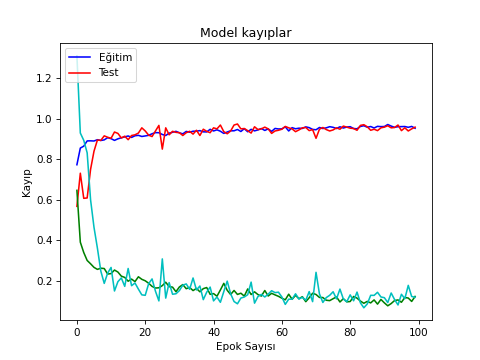

In [14]:
#Eğitim ve doğrulama değerlerinin grafik üzerinde gösterilmesi
import matplotlib.pyplot as plt 
plt.plot(model.history.history["accuracy"],color="b")
plt.plot(model.history.history["val_accuracy"],color="r")
plt.title("Model Başarımları")
plt.ylabel("Başarım")
plt.xlabel("Epok Sayısı")
plt.legend(["Eğitim","Test"], loc="upper left")
plt.show()


plt.plot(model.history.history["loss"],color="g")
plt.plot(model.history.history["val_loss"],color="c")
plt.title("Model kayıplar")
plt.ylabel("Kayıp")
plt.xlabel("Epok Sayısı")
plt.legend(["Eğitim","Test"], loc="upper left")
plt.show()